<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_S24/blob/master/08_01_Simple_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Single Layer Neural Network**
The code from the textbook [1] was modified to run on Google Colab.

[1] https://github.com/kursatkara/databook_python/blob/master/CH06/CH06_SEC01_1_NN.ipynb

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os
from sklearn import linear_model
import requests

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

In [7]:
# Local path where you want to store the file
local_file_path = 'dogData_w.mat'

# URL of the .mat file
url = 'https://github.com/kursatkara/databook_python/raw/master/DATA/dogData_w.mat'

# Check if the file already exists
if not os.path.exists(local_file_path):
    # Download the .mat file
    print("Downloading the file...")
    r = requests.get(url)
    if r.status_code == 200:
        # If download is successful, save the file locally
        with open(local_file_path, 'wb') as f:
            f.write(r.content)
        print("Download completed successfully.")
    else:
        print("Failed to retrieve the data. HTTP Status Code: {}".format(r.status_code))
else:
    print("File already exists.")

# Load the .mat file
dogdata_w_mat = io.loadmat(local_file_path)



File already exists.


In [6]:
# Local path where you want to store the file
local_file_path = 'catData_w.mat'

# URL of the .mat file
url = 'https://github.com/kursatkara/databook_python/raw/master/DATA/catData_w.mat'

# Check if the file already exists
if not os.path.exists(local_file_path):
    # Download the .mat file
    print("Downloading the file...")
    r = requests.get(url)
    if r.status_code == 200:
        # If download is successful, save the file locally
        with open(local_file_path, 'wb') as f:
            f.write(r.content)
        print("Download completed successfully.")
    else:
        print("Failed to retrieve the data. HTTP Status Code: {}".format(r.status_code))
else:
    print("File already exists.")

# Load the .mat file
catdata_w_mat = io.loadmat(local_file_path)

File already exists.


In [8]:
# dogs vs. cats
dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

CD = np.concatenate((dog_wave,cat_wave),axis=1)

train = np.concatenate((dog_wave[:,:60],cat_wave[:,:60]),axis=1)
test = np.concatenate((dog_wave[:,60:80],cat_wave[:,60:80]),axis=1)
label = np.repeat(np.array([1,-1]),60)

A = label @ np.linalg.pinv(train)
test_labels = np.sign(A@test)

In [9]:
lasso = linear_model.Lasso().fit(train.T,label)
A_lasso = lasso.coef_
test_labels_lasso = np.sign(A_lasso@test)

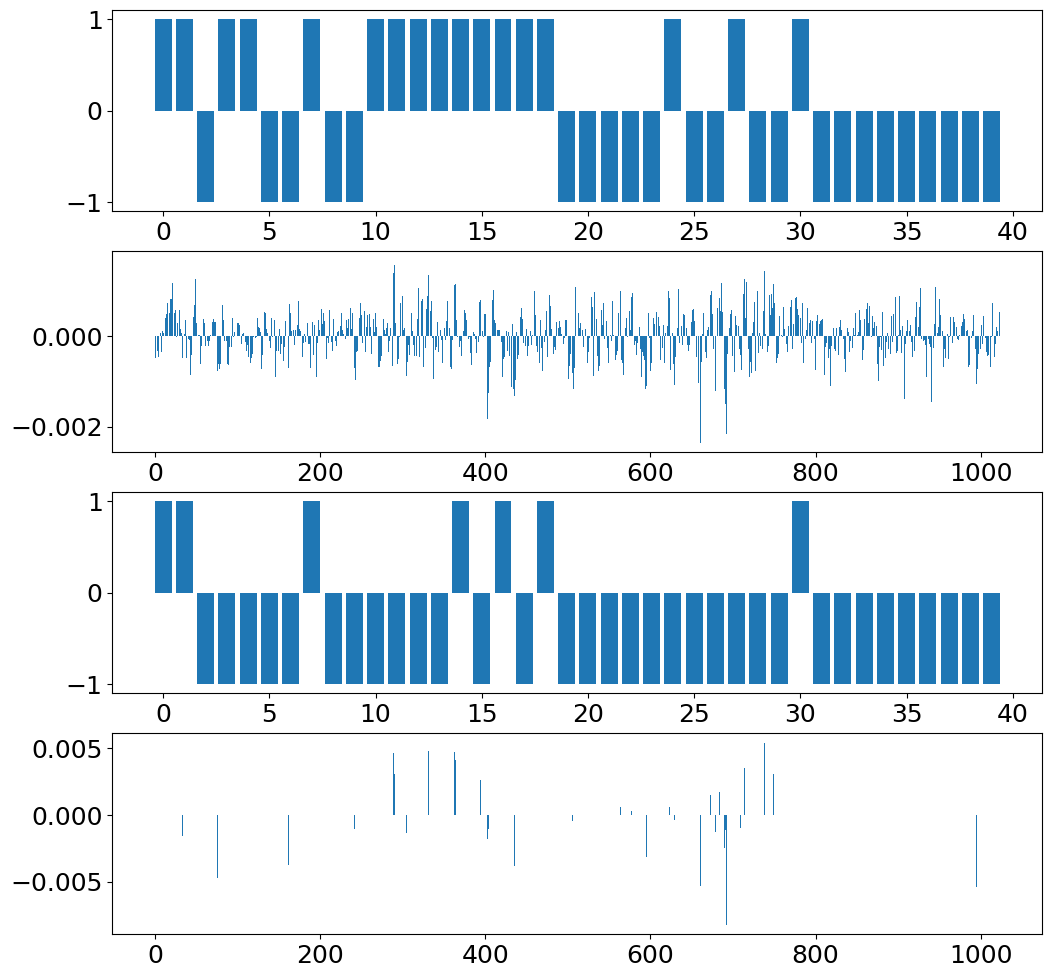

In [10]:
fig,axs = plt.subplots(4,1)
axs[0].bar(range(len(test_labels)),test_labels)
axs[1].bar(range(len(A)),A)
axs[2].bar(range(len(test_labels_lasso)),test_labels_lasso)
axs[3].bar(range(len(A_lasso)),A_lasso)


plt.show()

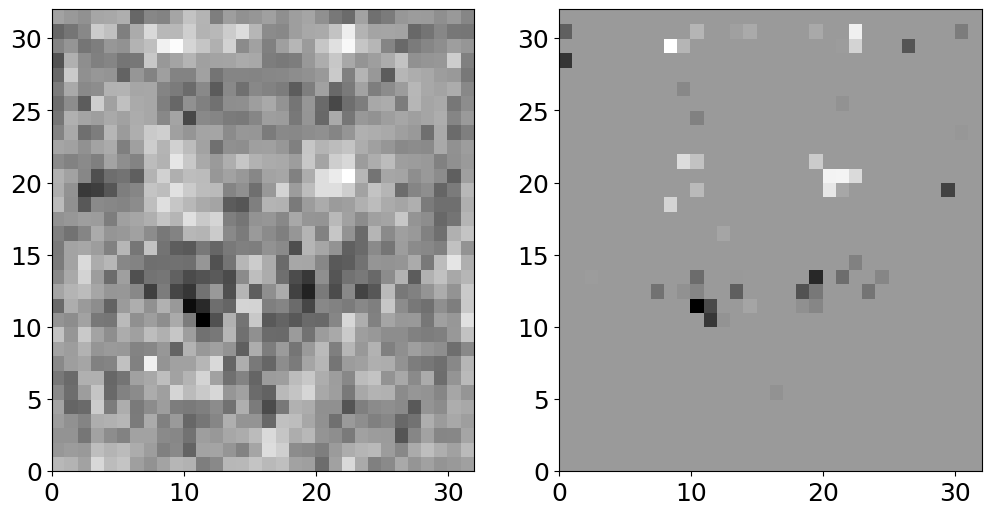

In [13]:
plt.rcParams['figure.figsize'] = [12, 6]
fig,axs = plt.subplots(1,2)
axs = axs.reshape(-1)
A2 = np.flipud(np.reshape(A,(32,32)))
A2_lasso = np.flipud(np.reshape(A_lasso,(32,32)))
axs[0].pcolor(np.rot90(A2),cmap='gray')
axs[1].pcolor(np.rot90(A2_lasso),cmap='gray')


plt.show()